# Continuously varying dFC

Dynamic functional connectivity can be estimated though the `connectivity` module. We start by getting some data from the ABIDE data set:

In [5]:
from matplotlib import pyplot as plt
from nilearn import datasets

# Preprocessed time series data from the ABIDE dataset
subject = 50010
data = datasets.fetch_abide_pcp(SUB_ID=subject, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160")
ts = data.rois_dosenbach160[0]

[fetch_abide_pcp] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp

We can then estimate dynamic functional connectivity with any of the included methods, e.g. Spatial Distance or Phase Synchronization:

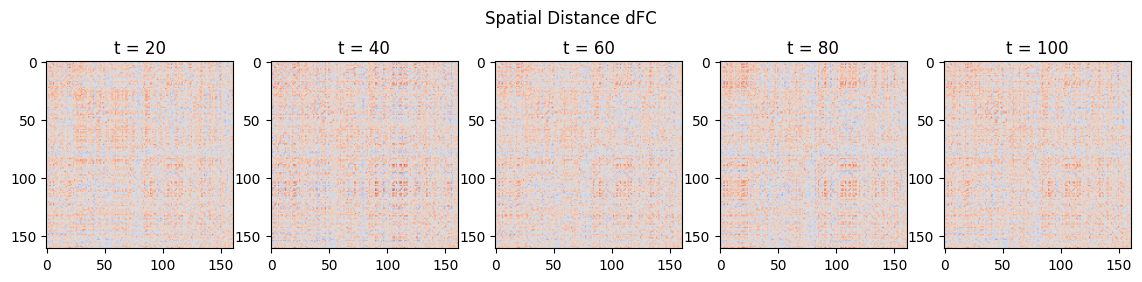

In [6]:
from comet import connectivity

sd = connectivity.SpatialDistance(ts, dist="euclidean")
dfc = sd.estimate()

# Plotting
fig, ax = plt.subplots(1, 5, figsize=(14, 3))
fig.suptitle("Spatial Distance dFC")
for i in range(5):
    ax[i].imshow(dfc[:,:,(1+i)*20], cmap="coolwarm", vmin=-1, vmax=1)
    ax[i].set_title(f"t = {(1+i)*20}")

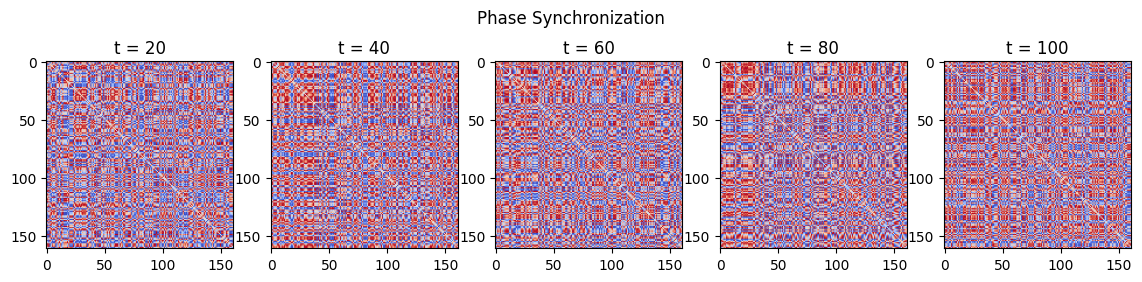

In [9]:
from nilearn.signal import clean

# For Phase Synchronization, the 0.01-0.1 Hz band of the time series is too wide, so we filter it further
ts_narrowband = clean(ts, t_r=2.0, low_pass=0.07, high_pass=0.03, detrend=False, standardize="zscore_sample")

# Estimate Phase Synchronization
ps = connectivity.PhaseSynchronization(ts_narrowband, method="crp")
dfc = ps.estimate()

# Plotting
fig, ax = plt.subplots(1, 5, figsize=(14, 3))
fig.suptitle("Phase Synchronization")
for i in range(5):
    ax[i].imshow(dfc[:,:,(1+i)*20], cmap="coolwarm", vmin=-1, vmax=1)
    ax[i].set_title(f"t = {(1+i)*20}")

Methods which rely on windowing techniques also contain a centers() method, which returns the corresponding BOLD time series indices of the dFC data: 

In [8]:
# Tapered sliding window
tsw = connectivity.SlidingWindow(ts, windowsize=45, stepsize=10, shape="gaussian", std=7)
dfc_tsw = tsw.estimate()
centers_tsw = tsw.centers()

print("Number of BOLD time points:", ts.shape[0])
print("Number of dFC estimates:", dfc_tsw.shape[2])
print("Centers of the sliding window (in BOLD time points):", centers_tsw)

Number of BOLD time points: 196
Number of dFC estimates: 16
Centers of the sliding window (in BOLD time points): [ 22  32  42  52  62  72  82  92 102 112 122 132 142 152 162 172]
